In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Making histogram (5 points)
There are information about amount of reads with one of 4 nucleotides in file `train.csv`. Make a distribution histogram of these numbers.

In [178]:
train_data = pd.read_csv('./data_files/train.csv')
train_data.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


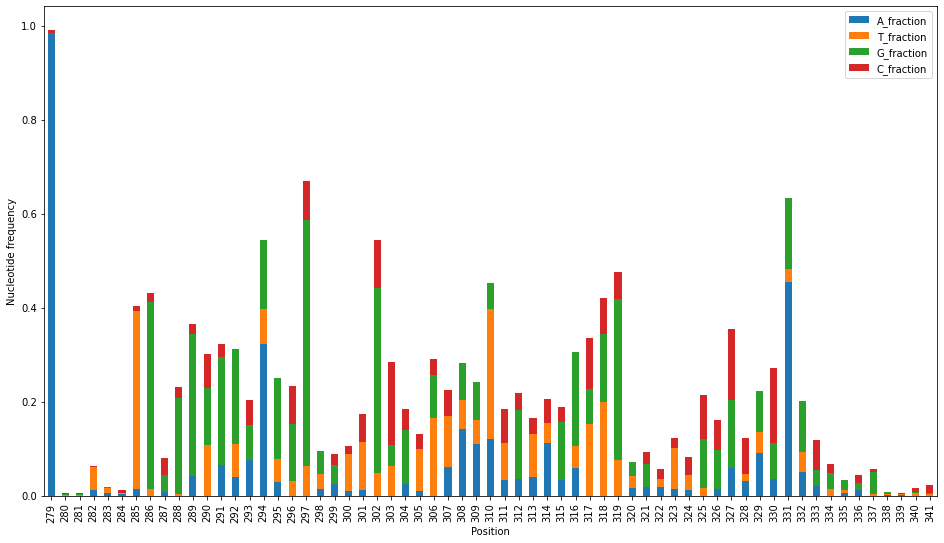

In [155]:
plot_train_data = train_data.set_index('pos')

plot_train_data.loc[:,'A_fraction':'C_fraction'].plot.bar(figsize=(16, 9), stacked = True)
plt.xlabel('Position')
plt.ylabel('Nucleotide frequency')
plt.show()

## 2. Filter the data in `train.csv` (5 points)
Save in file `train_part.csv` next part of `train.csv` file: (из предыдущего задания):
- Strings where `matches` more than mean
- Columns *pos*, *reads_all*, *mismatches*, *deletions*, *insertions*

In [32]:
mean_matches = train_data['matches'].mean()
train_part = train_data.query('matches > @mean_matches').loc[:,['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']]
train_part.to_csv('train_part.csv')

## 3. EDA (15 points)
Нужны корреляции, графики распределений
I will work with data that contains information about [items in McDonalds menu](https://www.kaggle.com/mcdonalds/nutrition-facts)

1. Uploading dataframe

In [179]:
mc_donalds_data = pd.read_csv('./data_files/mc_donalds_data.csv')
mc_donalds_data.head()

,Category,Item,Serving_size,Calories,Cal_Fat,Total_Fat,Satur_Fat,Trans_Fat,Cholesterol,Sodium,Carbohydrates,Dietary_fiber,Sugars,Protein,Vitamin_A_DV,Vitamin_C_DV
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,120.0,13.0,NaN,NaN,260.0,750.0,31.0,4.0,3.0,17.0,10.0,0.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250.0,70.0,8.0,3.0,0.0,25.0,770.0,30.0,4.0,3.0,18.0,6.0,0.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370.0,200.0,23.0,8.0,0.0,45.0,NaN,29.0,4.0,2.0,14.0,8.0,0.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,250.0,28.0,10.0,0.0,285.0,860.0,30.0,4.0,2.0,21.0,15.0,0.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,210.0,23.0,8.0,0.0,50.0,880.0,30.0,4.0,NaN,21.0,6.0,0.0


2. Looking at some descriptive numbers(means, std ...)

In [36]:
mc_donalds_data.describe()

,Calories,Cal_Fat,Total_Fat,Satur_Fat,Trans_Fat,Cholesterol,Sodium,Carbohydrates,Dietary_fiber,Sugars,Protein,Vitamin_A_DV,Vitamin_C_DV
count,245.000000,245.000000,248.000000,249.000000,242.000000,247.000000,236.000000,246.000000,247.000000,239.000000,246.000000,247.000000,243.000000
mean,367.346939,127.816327,14.044355,6.116466,0.194215,55.870445,493.940678,46.918699,1.635628,29.255230,13.520325,13.089069,8.814815
std,243.312400,130.086773,14.285339,5.362137,0.399023,87.959891,550.869082,27.190663,1.578832,28.424855,11.663198,22.820975,27.133026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200.000000,20.000000,1.875000,1.500000,0.000000,7.500000,115.000000,30.000000,0.000000,5.500000,4.000000,2.000000,0.000000
50%,340.000000,100.000000,11.000000,5.000000,0.000000,35.000000,190.000000,44.000000,1.000000,18.000000,12.000000,8.000000,0.000000
75%,480.000000,200.000000,22.250000,10.000000,0.000000,65.000000,885.000000,60.000000,3.000000,47.500000,19.000000,15.000000,4.000000
max,1880.000000,1060.000000,118.000000,20.000000,1.500000,575.000000,2290.000000,141.000000,7.000000,128.000000,87.000000,170.000000,240.000000


3. Observing if we have any NAs

In [37]:
mc_donalds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       260 non-null    object 
 1   Item           260 non-null    object 
 2   Serving_size   260 non-null    object 
 3   Calories       245 non-null    float64
 4   Cal_Fat        245 non-null    float64
 5   Total_Fat      248 non-null    float64
 6   Satur_Fat      249 non-null    float64
 7   Trans_Fat      242 non-null    float64
 8   Cholesterol    247 non-null    float64
 9   Sodium         236 non-null    float64
 10  Carbohydrates  246 non-null    float64
 11  Dietary_fiber  247 non-null    float64
 12  Sugars         239 non-null    float64
 13  Protein        246 non-null    float64
 14  Vitamin_A_DV   247 non-null    float64
 15  Vitamin_C_DV   243 non-null    float64
dtypes: float64(13), object(3)
memory usage: 32.6+ KB


<AxesSubplot:>

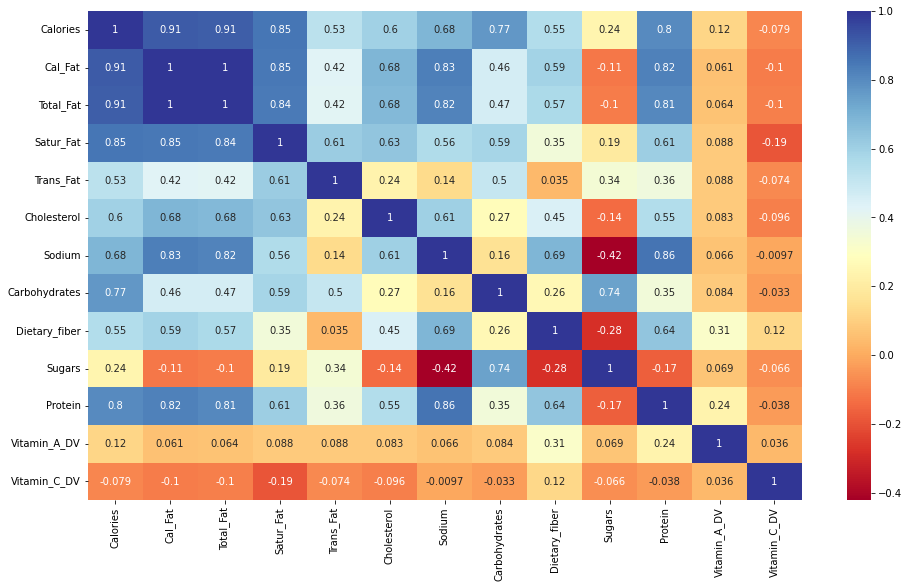

In [211]:
correlate = mc_donalds_data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlate, cmap = 'RdYlBu', annot=True)

4. Creating histograms with distributions of all features

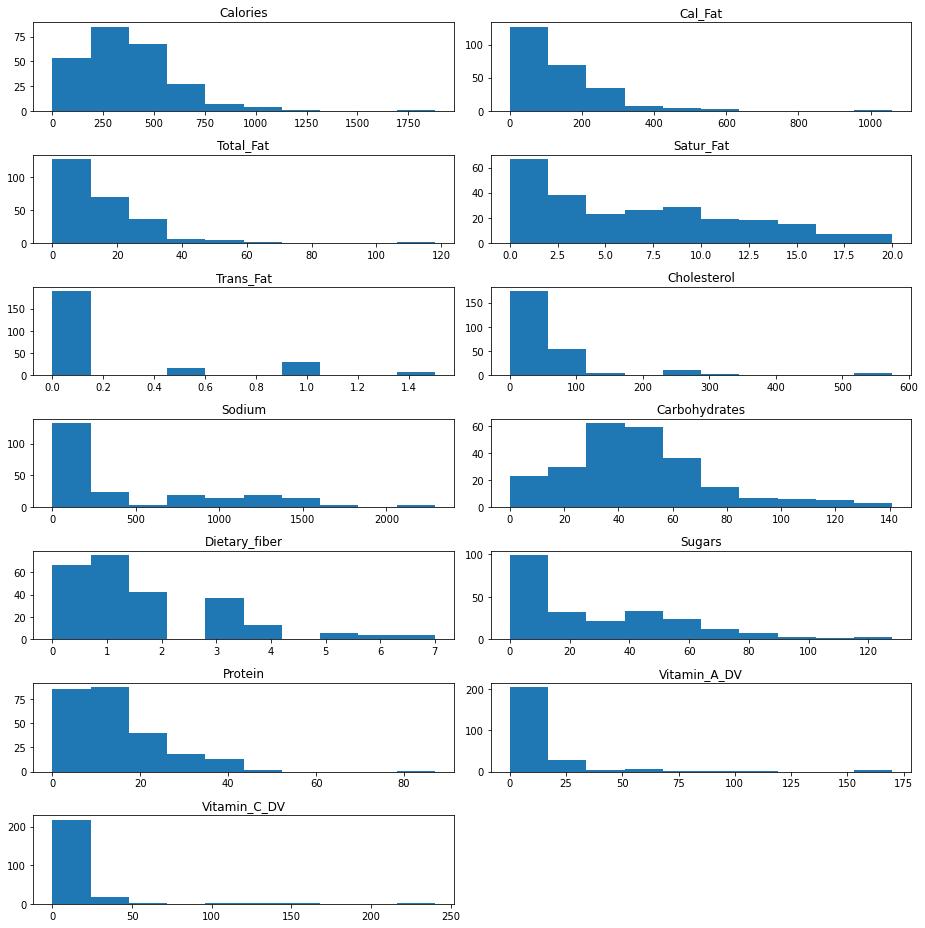

In [69]:
mc_data_ints = mc_donalds_data.iloc[:,3:]

plt.figure(figsize=(13, 13))
for i in range(mc_data_ints.shape[1]):
    plt.subplot(7, 2,i+1)
    plt.tight_layout()
    plt.hist(x=mc_data_ints.iloc[:,[i]])
    plt.title(mc_data_ints.columns[i])
plt.show()

Let's see if different food categories have different mean of calories

In [116]:
category_calories = mc_donalds_data.groupby('Category').agg({'Calories': 'mean'}).rename(columns={'Calories': 'mean Calories'})
category_calories.sort_values(['mean Calories'])

,mean Calories
Category,
Beverages,113.600000
Snacks & Sides,198.500000
Desserts,217.500000
Salads,270.000000
Coffee & Tea,283.586957
Beef & Pork,492.142857
Smoothies & Shakes,525.600000
Breakfast,530.000000
Chicken & Fish,552.962963


Now let's look at how much items of each class we have in dataframe

In [118]:
mc_donalds_data['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

## 4. Additional task

- Creating `read_gff` and `read_bed` functions to read files in formats `.gff` and `.bed`. These functions return pandas dataframes.
- Remove everything except rRNA type (16S, 23S, 5S) from the last column.
- Making table with counts of rRNA types for each sequence and barplot according to this data

1. Functions to read gff and bed files

In [86]:
def read_gff(path, names=None):
    gff = pd.read_csv(path, sep='\t', comment='#', header=None, names=names)
    return gff

def read_bed(path, names=None):
    bed = pd.read_csv(path, sep='\t', names=names)
    return bed

In [217]:
gff_df = read_gff('./data_files/rrna_annotation.gff')
gff_df.head()

,0,1,2,3,4,5,6,7,8
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,Name=23S_rRNA;product=23S ribosomal RNA


2. Leaving only rRNA type in the last column

In [218]:
gff_df.iloc[:,-1] = gff_df.iloc[:,-1].str.extract('([0-9]+S)')
gff_df.head()

,0,1,2,3,4,5,6,7,8
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,23S


3. Counting RNA types for each sequence and visualising it

In [219]:
rrna_types = pd.crosstab(gff_df.iloc[:,0], gff_df.iloc[:,-1])
rrna_types

8,16S,23S,5S
0,,,
Reference_1,2,2,2
Reference_10,5,5,0
Reference_11,2,2,2
Reference_12,2,2,2
Reference_13,4,4,4
Reference_14,4,4,5
Reference_15,8,8,8
Reference_16,7,7,8
Reference_17,7,7,8


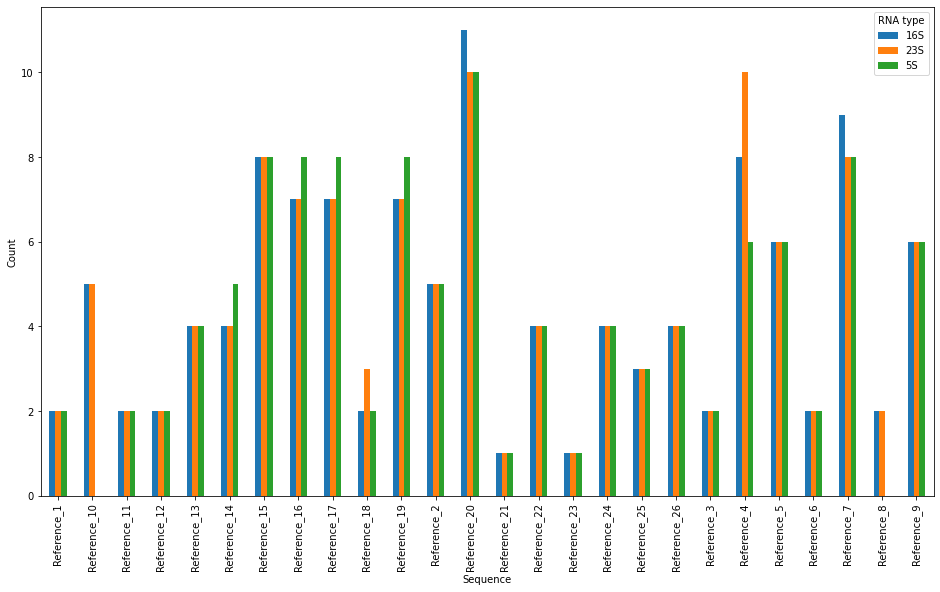

In [216]:
rrna_types.plot.bar(figsize=(16, 9))
plt.legend(title='RNA type')
plt.xlabel('Sequence')
plt.ylabel('Count')
plt.show()